Goal:

* Data Preparation and Cleaning
* Pairwise plot
* Hypothesis testing and CI of each column.
* MLR diagnostics?
* Full model fit: F test comparision and T test comparision.
* Model selection using: AIC/BIC, etc
* Reduced Model vs Full Model Annova test


# Data Understanding:

1. **PH Value:** The level of Acid-Base balance in water. A PH value between **6.5 to 8.5** is ideal for potability.

2. **Hardness:** The level of calcium and magnesium salt presence in water. These salts are dissolved from geologic deposits through which water travels. **Low hardness** water reacts less with soap and is more potable.

3. **Solids (Total dissolved solids - TDS):** The ablity to dissolve organic and inorganic minerals such as potassium, sodium, etc. These minerals produced un-wanted taste and diluted color in appearance of water. A TDS between **500 mg/l to 1000 mg/l** is prescribed for drinking.

4. **Chloramines:** Chlorine and chloramine are the major disinfectants used in public water systems. Chlorine levels **up to 4 milligrams per liter** (mg/L or 4 parts per million (ppm)) are considered safe in drinking water.

5. **Sulfate:** Sulfates are naturally occurring substances that are found in minerals, soil, and rocks. It ranges from 3 to 30 mg/L in most freshwater supplies, although WHO recommends **250 mg/L** as safe for drinking.

6. **Conductivity:** Electrical conductivity (EC) actually measures the ionic process of a solution that enables it to transmit current. Generally, the amount of dissolved solids in water determines the electrical conductivity. According to WHO standards, EC value should not exceeded **400 μS/cm**.

7. **Organic_carbon:** Total Organic Carbon (TOC) in source waters comes from decaying natural organic matter (NOM). **Lower TOC** is ideal for drinking.

8. **Trihalomethanes:** THMs are chemicals which may be found in water treated with chlorine. The THMs level varies according to the level of organic material, chlorine and the temperature of the water that is being treated. THM levels **up to 80 ppm** is considered safe in drinking water.

9. **Turbidity:** Turbidity in water refers to the cloudiness or haziness caused by suspended particles, such as silt, clay, and organic matter. According to the WHO, the recommended turbidity level for drinking water is **less than 5 NTU** for surface water and less than 1 NTU for treated drinking water.

10. **Potability:** Indicates if water is safe for human consumption where 1 means Potable and 0 means Not potable.




# Data Preparation

In [25]:
data <- read.csv("water_potability.csv")
head(data)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,NA,204.8905,20791.32,7.300212,368.5164,564.3087,10.379783,86.99097,2.963135,0
2,3.716080,129.4229,18630.06,6.635246,NA,592.8854,15.180013,56.32908,4.500656,0
3,8.099124,224.2363,19909.54,9.275884,NA,418.6062,16.868637,66.42009,3.055934,0
4,8.316766,214.3734,22018.42,8.059332,356.8861,363.2665,18.436524,100.34167,4.628771,0
5,9.092223,181.1015,17978.99,6.546600,310.1357,398.4108,11.558279,31.99799,4.075075,0
6,5.584087,188.3133,28748.69,7.544869,326.6784,280.4679,8.399735,54.91786,2.559708,0


## Handle Nulls

In [26]:
# Check for null values
null_values <- is.na(data)
print(colSums(null_values))

             ph        Hardness          Solids     Chloramines         Sulfate 
            491               0               0               0             781 
   Conductivity  Organic_carbon Trihalomethanes       Turbidity      Potability 
              0               0             162               0               0 


In [27]:
# Replace the nulls with the respective Potability category's mean value.

# ph column
mean_0 <- mean(data$ph[data$Potability == 0], na.rm = TRUE)
mean_1 <- mean(data$ph[data$Potability == 1], na.rm = TRUE)
data$ph <- ifelse(is.na(data$ph) & data$Potability == 0, mean_0, ifelse(is.na(data$ph) & data$Potability == 1, mean_1, data$ph))

# Sulfate column
mean_0 <- mean(data$Sulfate [data$Potability == 0], na.rm = TRUE)
mean_1 <- mean(data$Sulfate [data$Potability == 1], na.rm = TRUE)
data$Sulfate  <- ifelse(is.na(data$Sulfate ) & data$Potability == 0, mean_0, ifelse(is.na(data$Sulfate ) & data$Potability == 1, mean_1, data$Sulfate ))

# Trihalomethanes column
mean_0 <- mean(data$Trihalomethanes[data$Potability == 0], na.rm = TRUE)
mean_1 <- mean(data$Trihalomethanes[data$Potability == 1], na.rm = TRUE)
data$Trihalomethanes <- ifelse(is.na(data$Trihalomethanes) & data$Potability == 0, mean_0, ifelse(is.na(data$Trihalomethanes) & data$Potability == 1, mean_1, data$Trihalomethanes))


In [28]:
# Check for null values
null_values <- is.na(data)
print(colSums(null_values))

             ph        Hardness          Solids     Chloramines         Sulfate 
              0               0               0               0               0 
   Conductivity  Organic_carbon Trihalomethanes       Turbidity      Potability 
              0               0               0               0               0 


## Data Transformation: Match the units of all variables.

* Convert Conductivity from μS/cm to PPM: 1 microsiemens/cm (μS/cm) = 0.64 parts per million (PPM)

* Convert Turbidity from NTU to PPM:  3 NTU = 1 mg/l (ppm).


In [29]:
summary(data)

       ph            Hardness          Solids         Chloramines    
 Min.   : 0.000   Min.   : 47.43   Min.   :  320.9   Min.   : 0.352  
 1st Qu.: 6.278   1st Qu.:176.85   1st Qu.:15666.7   1st Qu.: 6.127  
 Median : 7.085   Median :196.97   Median :20927.8   Median : 7.130  
 Mean   : 7.081   Mean   :196.37   Mean   :22014.1   Mean   : 7.122  
 3rd Qu.: 7.870   3rd Qu.:216.67   3rd Qu.:27332.8   3rd Qu.: 8.115  
 Max.   :14.000   Max.   :323.12   Max.   :61227.2   Max.   :13.127  
    Sulfate       Conductivity   Organic_carbon  Trihalomethanes  
 Min.   :129.0   Min.   :181.5   Min.   : 2.20   Min.   :  0.738  
 1st Qu.:317.1   1st Qu.:365.7   1st Qu.:12.07   1st Qu.: 56.648  
 Median :334.6   Median :421.9   Median :14.22   Median : 66.304  
 Mean   :333.8   Mean   :426.2   Mean   :14.28   Mean   : 66.396  
 3rd Qu.:350.4   3rd Qu.:481.8   3rd Qu.:16.56   3rd Qu.: 76.667  
 Max.   :481.0   Max.   :753.3   Max.   :28.30   Max.   :124.000  
   Turbidity       Potability    
 Min.  

In [30]:
data$Conductivity <- data$Conductivity*0.64
data$Turbidity <- data$Turbidity/3

In [31]:
summary(data)

       ph            Hardness          Solids         Chloramines    
 Min.   : 0.000   Min.   : 47.43   Min.   :  320.9   Min.   : 0.352  
 1st Qu.: 6.278   1st Qu.:176.85   1st Qu.:15666.7   1st Qu.: 6.127  
 Median : 7.085   Median :196.97   Median :20927.8   Median : 7.130  
 Mean   : 7.081   Mean   :196.37   Mean   :22014.1   Mean   : 7.122  
 3rd Qu.: 7.870   3rd Qu.:216.67   3rd Qu.:27332.8   3rd Qu.: 8.115  
 Max.   :14.000   Max.   :323.12   Max.   :61227.2   Max.   :13.127  
    Sulfate       Conductivity   Organic_carbon  Trihalomethanes  
 Min.   :129.0   Min.   :116.1   Min.   : 2.20   Min.   :  0.738  
 1st Qu.:317.1   1st Qu.:234.1   1st Qu.:12.07   1st Qu.: 56.648  
 Median :334.6   Median :270.0   Median :14.22   Median : 66.304  
 Mean   :333.8   Mean   :272.8   Mean   :14.28   Mean   : 66.396  
 3rd Qu.:350.4   3rd Qu.:308.3   3rd Qu.:16.56   3rd Qu.: 76.667  
 Max.   :481.0   Max.   :482.1   Max.   :28.30   Max.   :124.000  
   Turbidity        Potability    
 Min. 

In [32]:
write.csv(data, file = "water_potability_cleaned.csv", row.names = FALSE)

# Data Exploration

In [33]:
data <- read.csv("water_potability_cleaned.csv")
head(data)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,7.085378,204.8905,20791.32,7.300212,368.5164,361.1575,10.379783,86.99097,0.9877118,0
2,3.716080,129.4229,18630.06,6.635246,334.5643,379.4466,15.180013,56.32908,1.5002188,0
3,8.099124,224.2363,19909.54,9.275884,334.5643,267.9080,16.868637,66.42009,1.0186446,0
4,8.316766,214.3734,22018.42,8.059332,356.8861,232.4906,18.436524,100.34167,1.5429235,0
5,9.092223,181.1015,17978.99,6.546600,310.1357,254.9829,11.558279,31.99799,1.3583585,0
6,5.584087,188.3133,28748.69,7.544869,326.6784,179.4995,8.399735,54.91786,0.8532361,0


In [52]:
install.packages('corrplot')
library(corrplot)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

corrplot 0.92 loaded



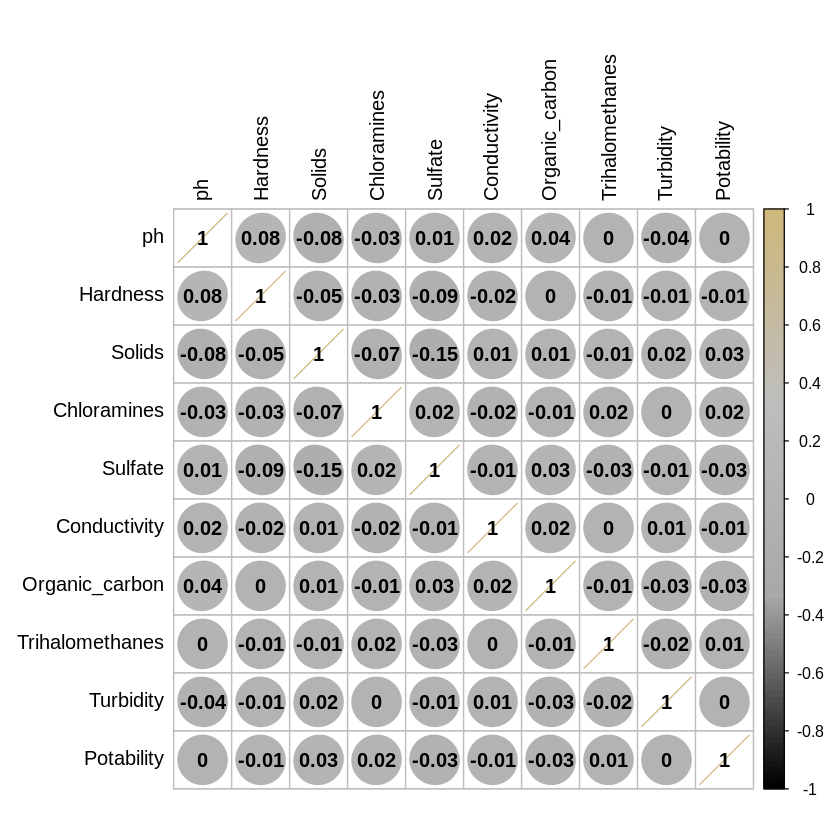

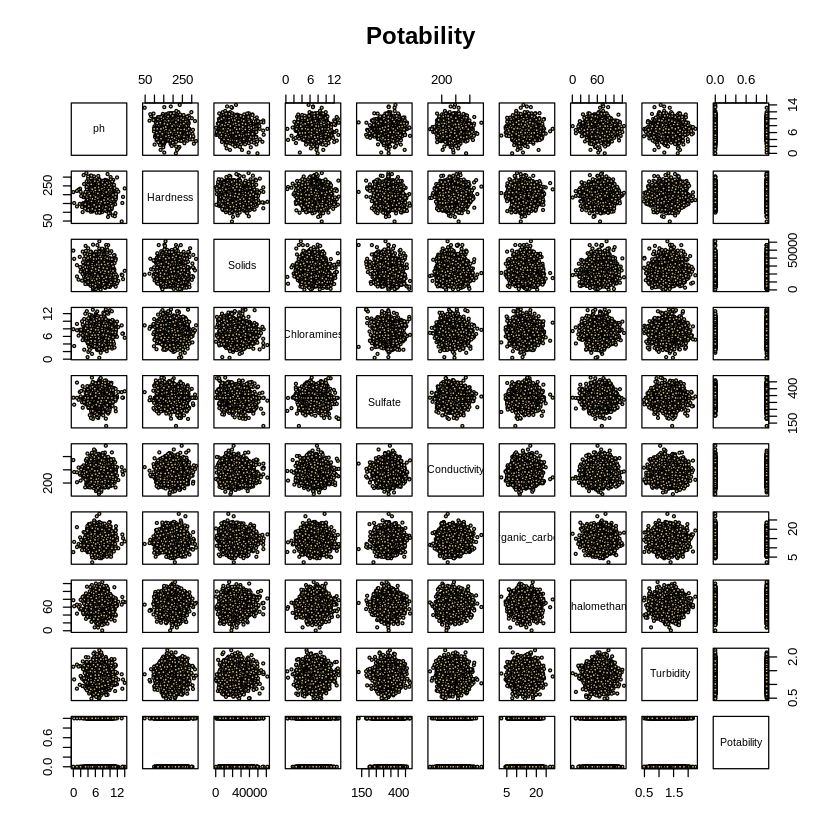

In [54]:
# Correlation Plot
col = colorRampPalette(c("black", "darkgrey", "grey","#CFB87C"))
corrplot(cor(data), method = "ellipse", col = col(100),  addCoef.col = "black", tl.col = "black")

# Pairwise scatter plot
pairs(data, main = "Potability", pch = 21,  bg = c("#CFB87C"), cex = 0.5)

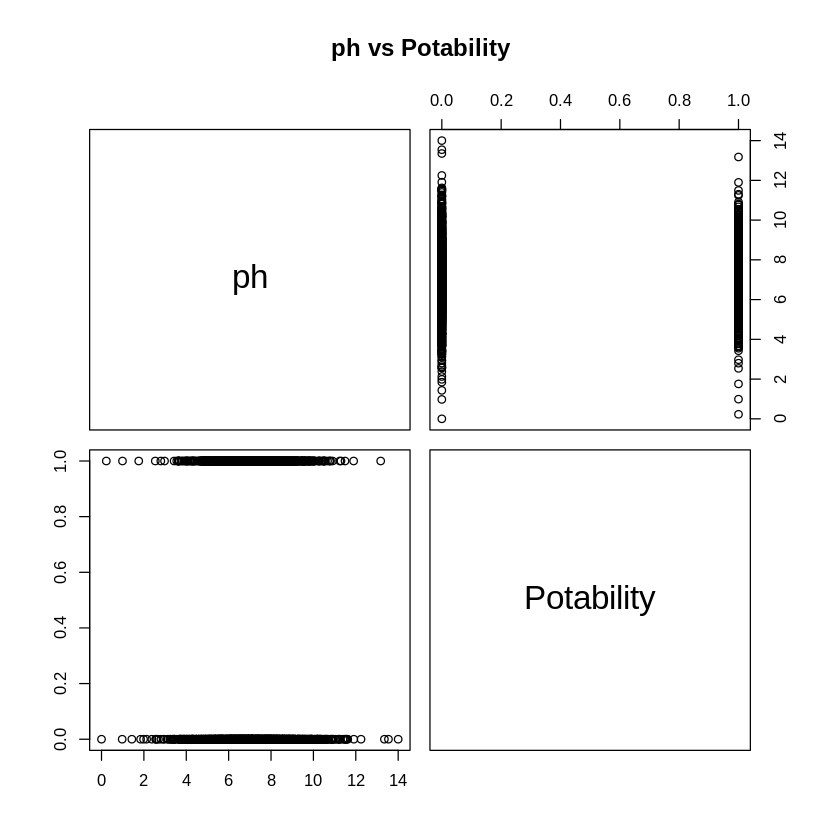

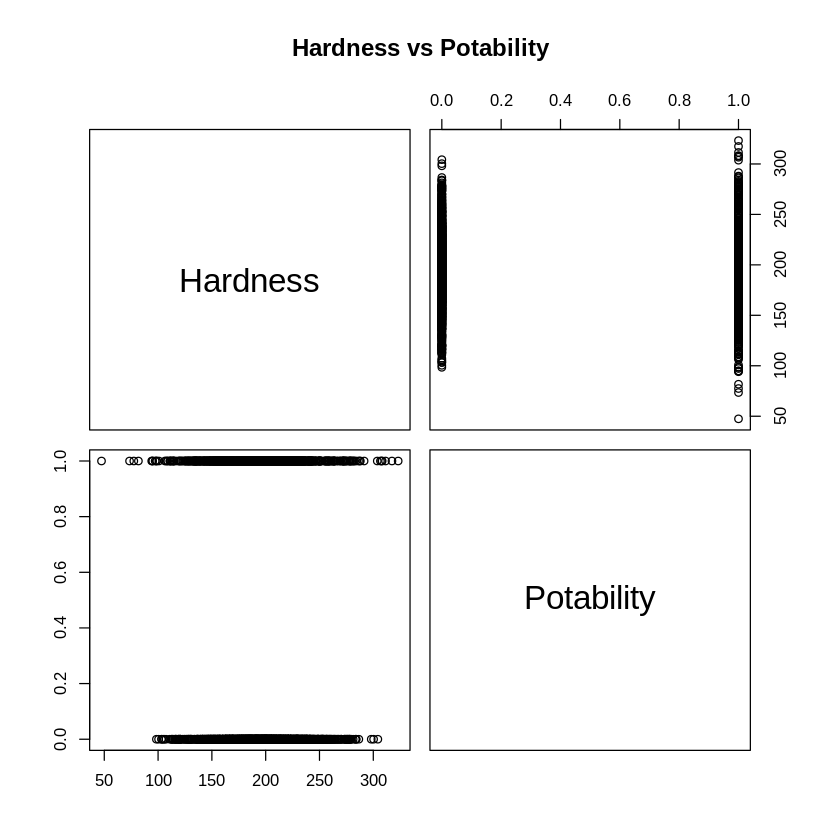

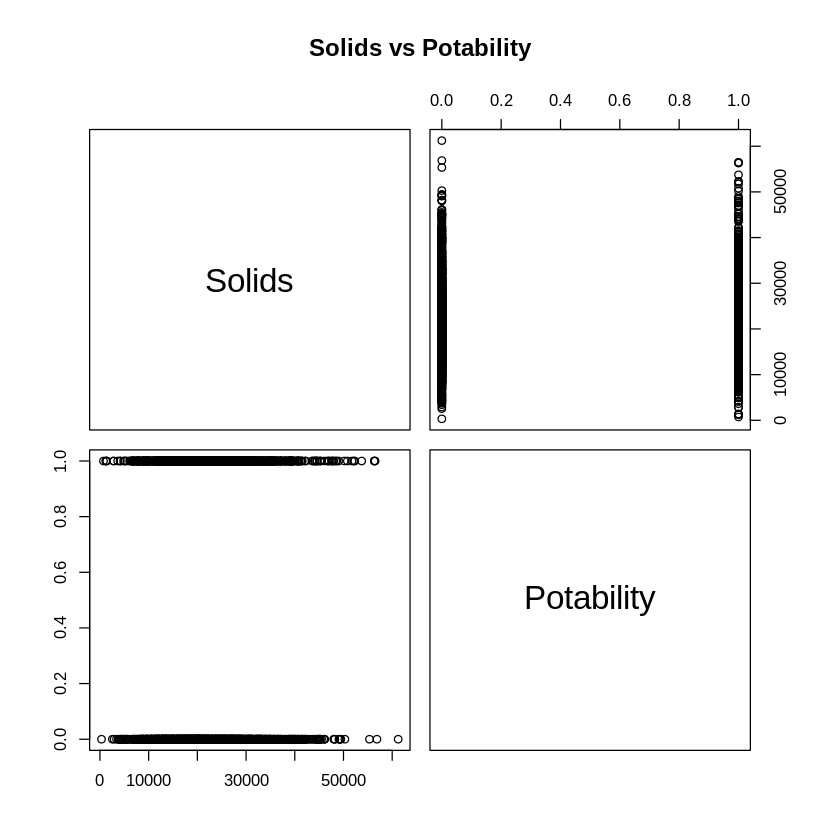

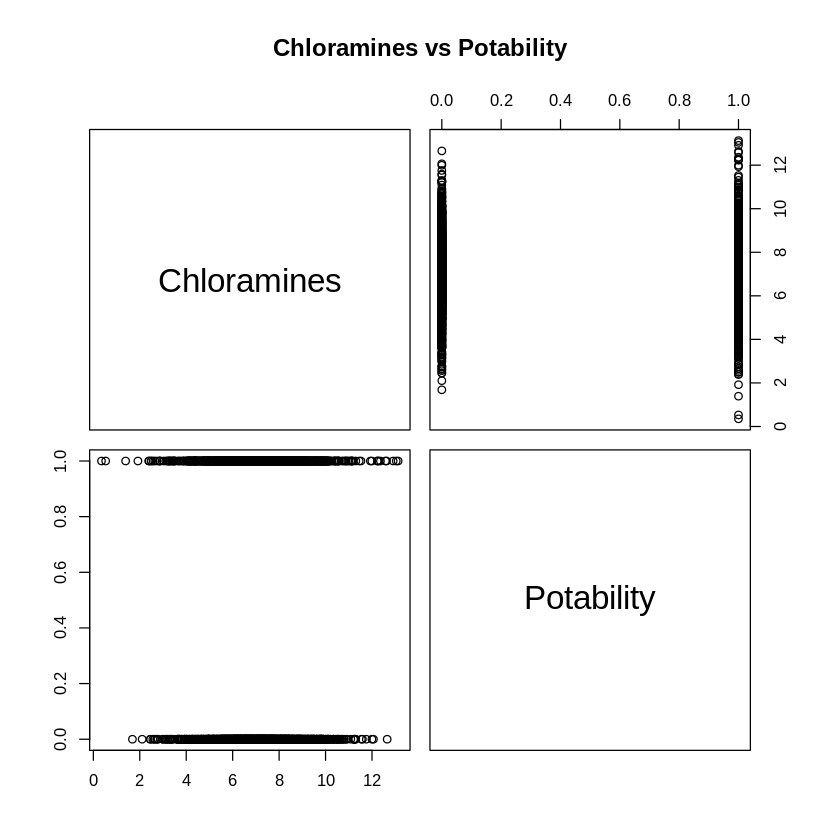

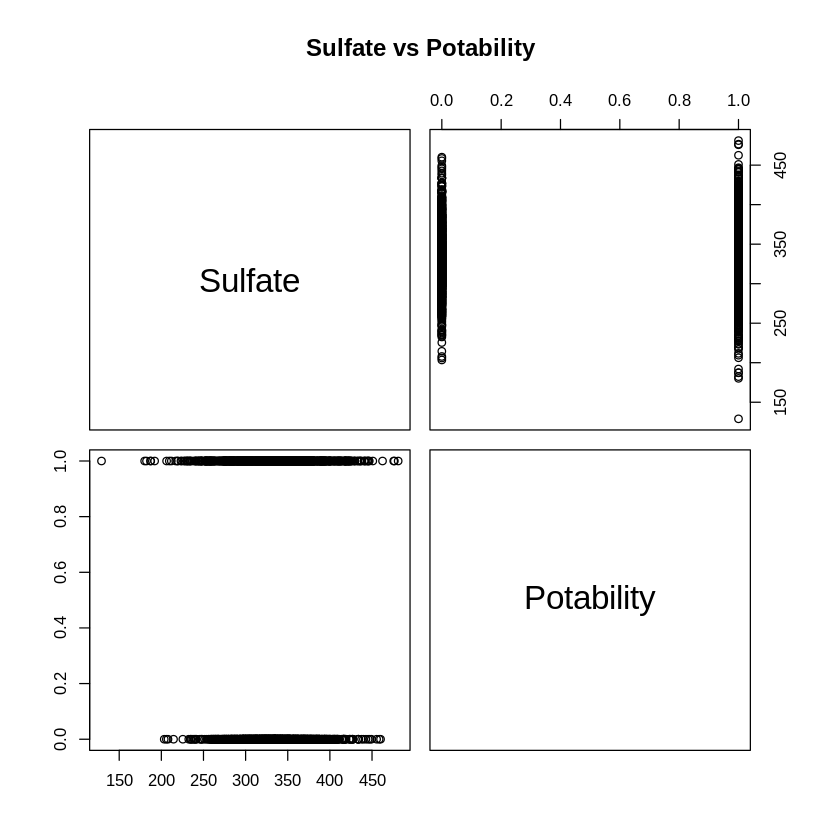

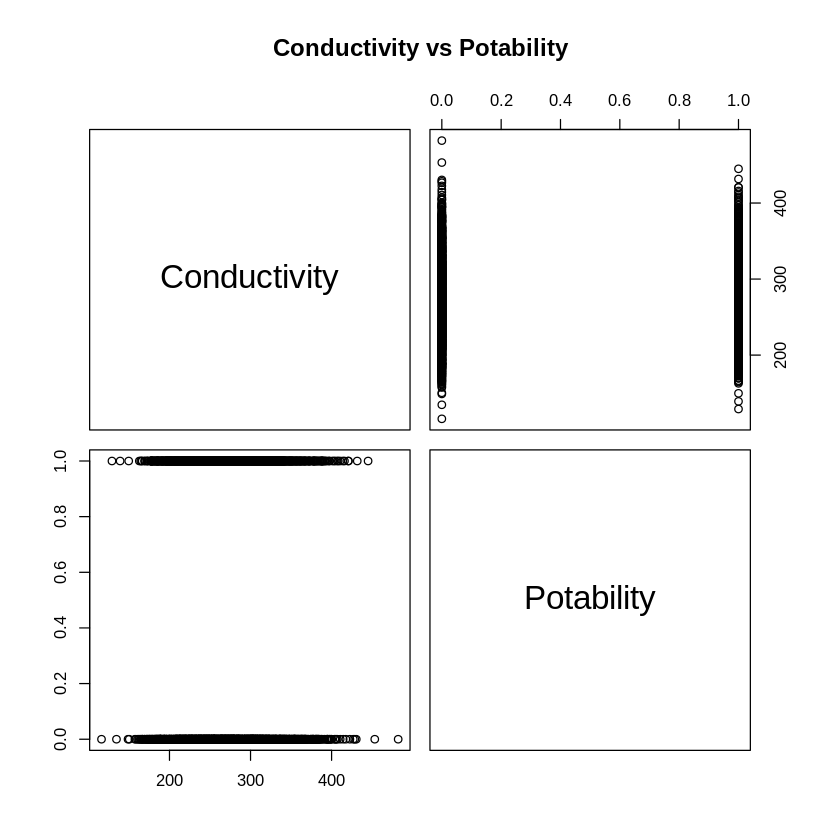

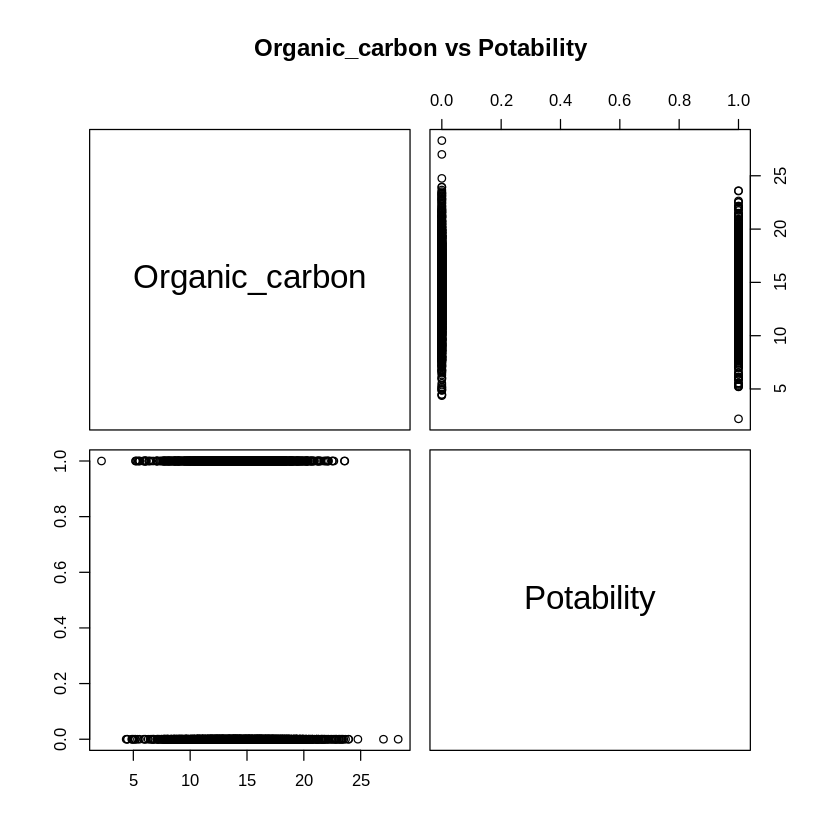

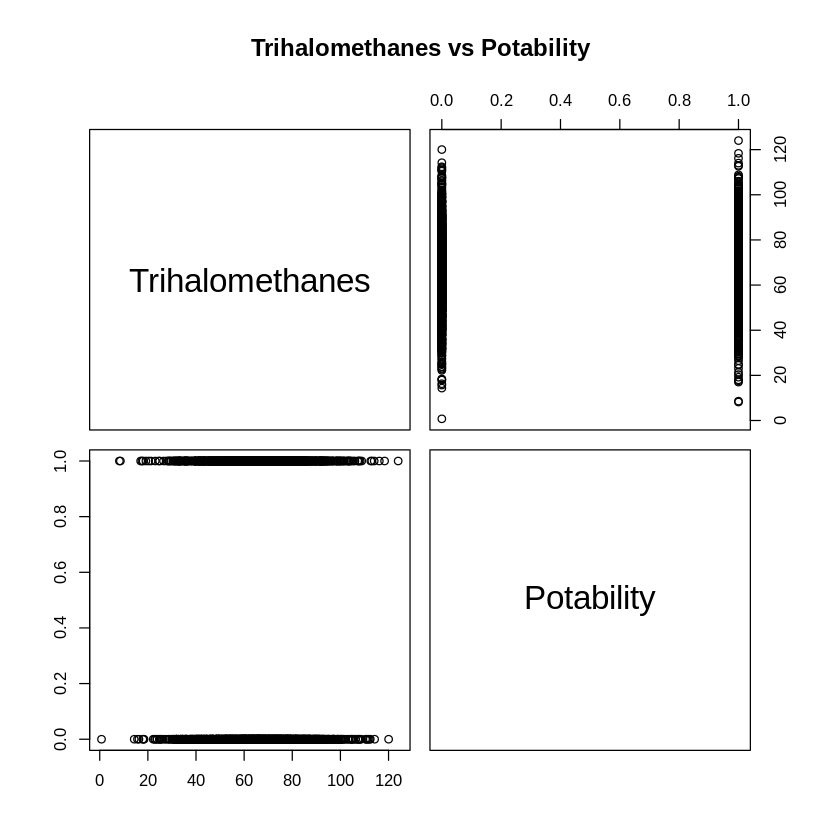

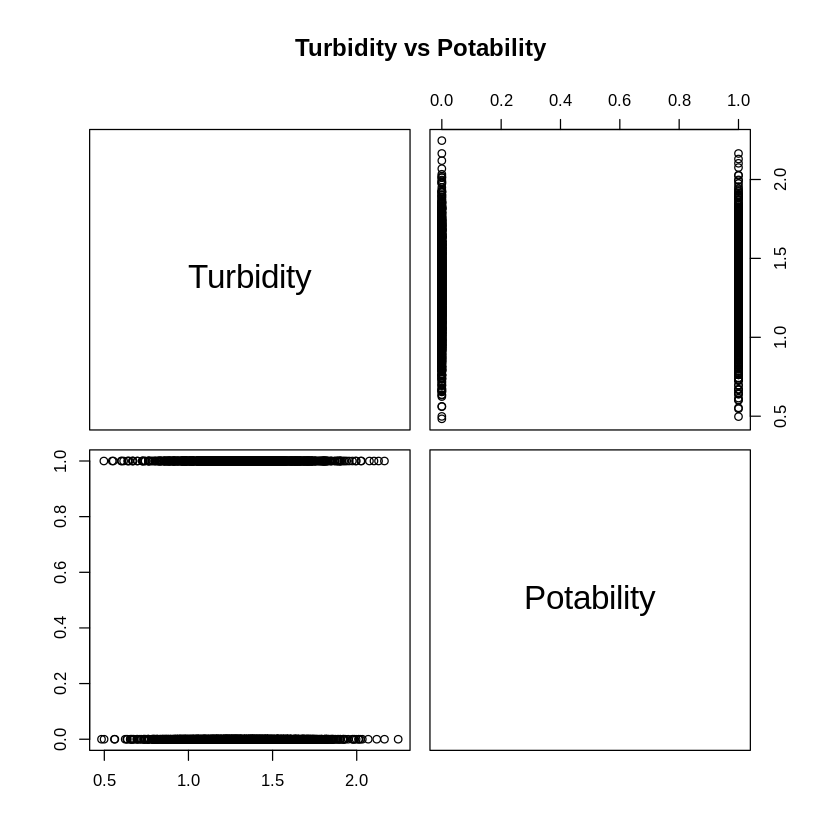

In [55]:
# Each column vs Potability
for (col in setdiff(names(data), "Potability")) {
  pairs(data[, c(col, "Potability")], main = paste(col, "vs Potability"))
}

None of the columns exhibit linear separability when considered individually with the target column. Columns when combined together may demonstrate linear spearability.

# Logistic Regression

In [107]:
# Split training and test data
set.seed(123)

smp_size <- floor(0.75 * nrow(data))
train_ind <- sample(seq_len(nrow(data)), size = smp_size)

train <- data[train_ind, ]
test <- data[-train_ind, ]

dim(train)
dim(test)

[1] 2457   10

[1] 819  10

## Full model fit

In [108]:
full_model <- glm(Potability ~ ., data = train, family = binomial)
summary(full_model)

pred <- predict(full_model, newdata = test, type = "response")

# Convert probabilities to binary predictions based on the threshold
threshold <- 0.5
predicted_classes <- ifelse(pred >= threshold, 1, 0)

# Calculate accuracy
accuracy <- mean(predicted_classes == test$Potability)
cat('Accuracy: ',accuracy)


Call:
glm(formula = Potability ~ ., family = binomial, data = train)

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)  
(Intercept)      2.306e-01  7.049e-01   0.327   0.7436  
ph              -7.781e-03  2.830e-02  -0.275   0.7833  
Hardness        -1.062e-04  1.263e-03  -0.084   0.9330  
Solids           7.413e-06  4.771e-06   1.554   0.1202  
Chloramines      2.338e-02  2.647e-02   0.883   0.3771  
Sulfate         -1.629e-03  1.165e-03  -1.398   0.1621  
Conductivity    -2.194e-04  8.089e-04  -0.271   0.7862  
Organic_carbon  -2.777e-02  1.261e-02  -2.203   0.0276 *
Trihalomethanes  8.539e-04  2.654e-03   0.322   0.7476  
Turbidity       -4.805e-03  1.571e-01  -0.031   0.9756  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 3276.9  on 2456  degrees of freedom
Residual deviance: 3265.8  on 2447  degrees of freedom
AIC: 3285.8

Number of Fisher Scoring iterations: 4


Accuracy:  0.6007326

## Model Selection

In [59]:
#install.packages('leaps')
library(leaps)
library(MASS)

In [110]:
# Fint the best model number using regsubsets()

n = dim(train)[1];
reg1 = regsubsets(Potability ~ ., data = train)
rs = summary(reg1)
rs$which

,(Intercept),ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
1,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE
2,TRUE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE
3,TRUE,FALSE,FALSE,TRUE,FALSE,TRUE,FALSE,TRUE,FALSE,FALSE
4,TRUE,FALSE,FALSE,TRUE,TRUE,TRUE,FALSE,TRUE,FALSE,FALSE
5,TRUE,FALSE,FALSE,TRUE,TRUE,TRUE,FALSE,TRUE,TRUE,FALSE
6,TRUE,TRUE,FALSE,TRUE,TRUE,TRUE,FALSE,TRUE,TRUE,FALSE
7,TRUE,TRUE,FALSE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE
8,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE


Warning message in 2 * (2:7) + n * log(rs$rss/n):
“longer object length is not a multiple of shorter object length”
Warning message in log(n) * (2:7) + n * log(rs$rss/n):
“longer object length is not a multiple of shorter object length”


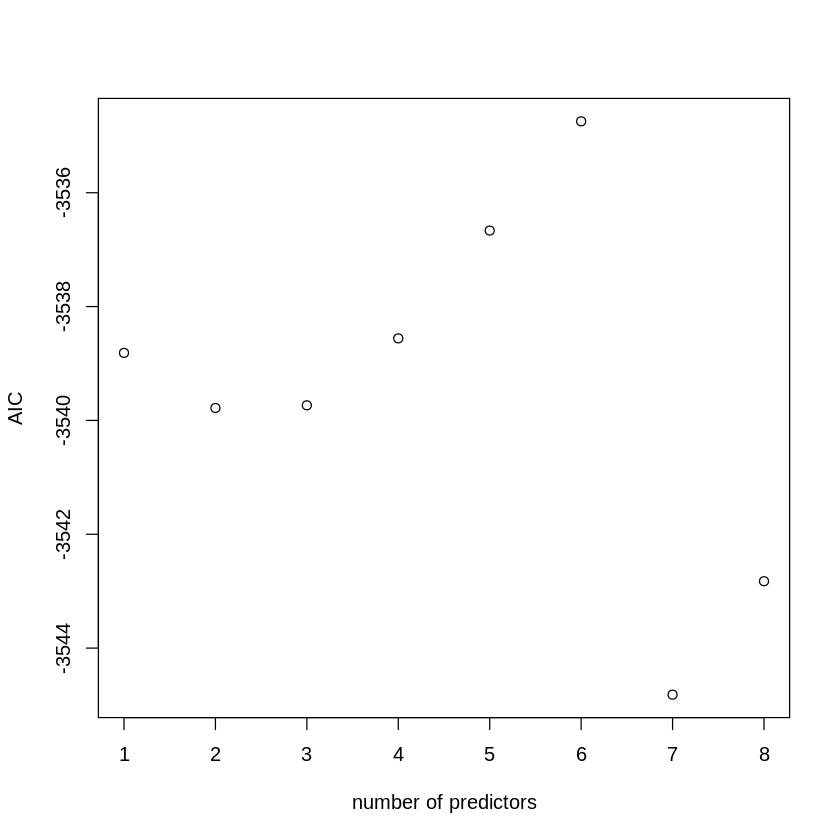

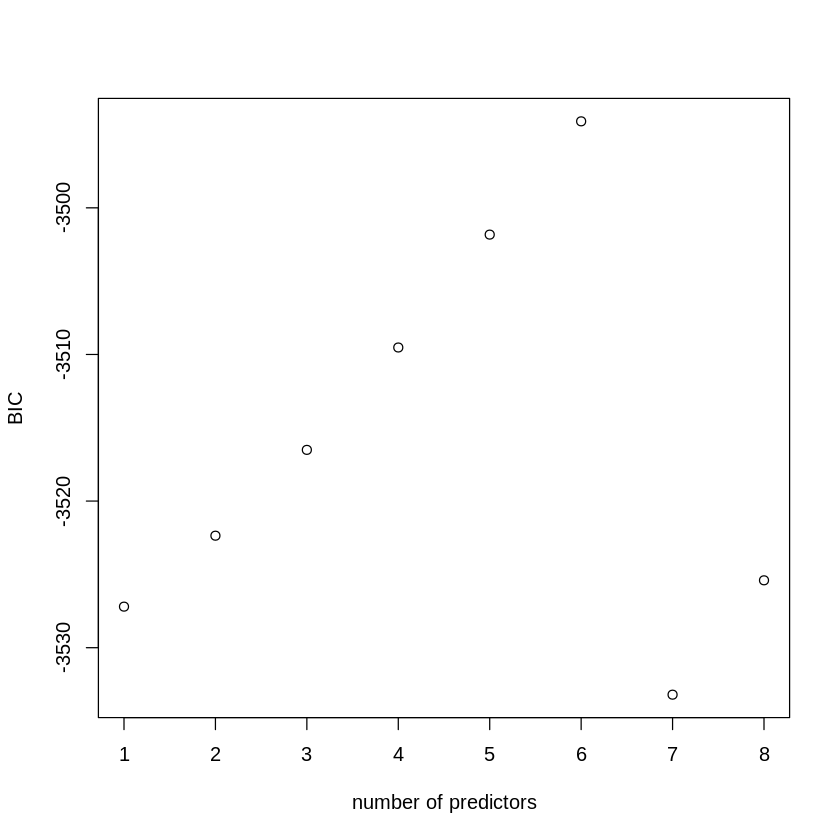

In [111]:
# Calculate AIC
AIC = 2*(2:7) + n*log(rs$rss/n)
plot(AIC ~ I(1:8), xlab = "number of predictors", ylab = "AIC")

# Calculate BIC
BIC = log(n)*(2:7) + n*log(rs$rss/n)
plot(BIC ~ I(1:8), xlab = "number of predictors", ylab = "BIC")

Both AIC and BIC suggests the k=7 as the best fit model, which is excluding Turbidity and Hardness columns.

In [112]:
reduced_model <- glm(Potability ~ .- Hardness -Turbidity , data = train, family = binomial)
summary(reduced_model)

pred <- predict(reduced_model, newdata = test, type = "response")

# Convert probabilities to binary predictions based on the threshold
threshold <- 0.5
predicted_classes <- ifelse(pred >= threshold, 1, 0)

# Calculate accuracy
accuracy <- mean(predicted_classes == test$Potability)
cat('Accuracy: ',accuracy)


Call:
glm(formula = Potability ~ . - Hardness - Turbidity, family = binomial, 
    data = train)

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)  
(Intercept)      1.992e-01  6.004e-01   0.332   0.7401  
ph              -7.944e-03  2.819e-02  -0.282   0.7781  
Solids           7.436e-06  4.759e-06   1.563   0.1182  
Chloramines      2.342e-02  2.646e-02   0.885   0.3761  
Sulfate         -1.617e-03  1.156e-03  -1.398   0.1620  
Conductivity    -2.186e-04  8.085e-04  -0.270   0.7869  
Organic_carbon  -2.778e-02  1.260e-02  -2.204   0.0275 *
Trihalomethanes  8.589e-04  2.652e-03   0.324   0.7460  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 3276.9  on 2456  degrees of freedom
Residual deviance: 3265.8  on 2449  degrees of freedom
AIC: 3281.8

Number of Fisher Scoring iterations: 4


Accuracy:  0.6007326

Reduced model's accuracy is has not upgrded much from the full model according to AIC $ BIC's best features.

In [125]:
accuracy_arr <- c() # Empty array to store MSPE values

for (n in 1:8) {
  nth_row <- rs$which[n, ]

  # column names where TRUE is present in the nth row
  selected_columns <- colnames(rs$which)[nth_row]
  selected_columns <- selected_columns[selected_columns != "(Intercept)"]
  concatenated_columns <- paste(selected_columns, collapse = " + ")
  print(concatenated_columns)

  # Fit a logistic regression model using lm()
  lm_formula <- as.formula(paste("Potability ~", concatenated_columns))
  lm_model <- glm(lm_formula , data = data, family = binomial)

  # Calculate accuracy on test data
  preds <- predict(lm_model, newdata = test)
  threshold <- 0.5
  predicted_classes <- ifelse(pred >= threshold, 1, 0)
  accuracy <- mean(predicted_classes == test$Potability)
  accuracy_arr <- c(accuracy_arr, accuracy)
  cat("\nAccuracy:", accuracy,"\n\n\n")
}
cat("\n\nAccuracy Array:",accuracy_arr)

[1] "Organic_carbon"

Accuracy: 0.6007326 


[1] "Solids + Organic_carbon"

Accuracy: 0.6007326 


[1] "Solids + Sulfate + Organic_carbon"

Accuracy: 0.6007326 


[1] "Solids + Chloramines + Sulfate + Organic_carbon"

Accuracy: 0.6007326 


[1] "Solids + Chloramines + Sulfate + Organic_carbon + Trihalomethanes"

Accuracy: 0.6007326 


[1] "ph + Solids + Chloramines + Sulfate + Organic_carbon + Trihalomethanes"

Accuracy: 0.6007326 


[1] "ph + Solids + Chloramines + Sulfate + Conductivity + Organic_carbon + Trihalomethanes"

Accuracy: 0.6007326 


[1] "ph + Hardness + Solids + Chloramines + Sulfate + Conductivity + Organic_carbon + Trihalomethanes"

Accuracy: 0.6007326 




Accuracy Array: 0.6007326 0.6007326 0.6007326 0.6007326 0.6007326 0.6007326 0.6007326 0.6007326

In [128]:
value_counts <- table(predicted_classes)
print(value_counts)

predicted_classes
  0   1 
816   3 


Reason for same accuracy is because all the models has predicted the values to be class '0'.

Fix: Plot the prediction probability againt any variable and alter the threshold.



# Doubts

1. Why regsubsets only have 8 rows for 9 independent variables?